# KNN with sklearn #

This notebook creates a KNN model for each monk. The best combination of hyperparameters is selected performing a grid search. Below there is a brief account about the implementation of each monk's KNN model. During the model selection we selected the best one that uses the best set of hyperparameters.


## Monk1 ##

Hyperparameters considered for the grid search:

1. n_neighbors
2. algorithm

Model selection performed choosing the model with the best tuple of hyperparameters.

## Monk2 ##

Hyperparameters considered for the grid search:

1. n_neighbors
2. algorithm

Model selection performed choosing the model with the best tuple of hyperparameters.

## Monk3 ##

Hyperparameters considered for the grid search:

1. n_neighbors
2. algorithm

Model selection performed choosing the model with the best tuple of hyperparameters.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from numpy import loadtxt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

import joblib

## Monk 1

### Importing datasets

In [2]:
colnames = ['class', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'id']
monk1_tr = pd.read_csv("./dataset/monk1/monks-1.train", sep = " ", skipinitialspace=True, names = colnames)
monk1_tr = monk1_tr.drop('id', axis = 1)

monk1_ts = pd.read_csv("./dataset/monk1/monks-1.test", sep = " ", skipinitialspace=True, names = colnames)
monk1_ts = monk1_ts.drop('id', axis = 1)

In [3]:
x_monk1_tr = monk1_tr.iloc[:, 1:7].values
y_monk1_tr = monk1_tr.iloc[:, 0].values

x_monk1_ts = monk1_ts.iloc[:, 1:7].values
y_monk1_ts = monk1_ts.iloc[:, 0].values

### Data normalization

In [4]:
scaler = StandardScaler()
scaler.fit(x_monk1_tr)
x_monk1_tr = scaler.transform(x_monk1_tr)
x_monk1_ts = scaler.transform(x_monk1_ts)

### Grid search
We are going to tune the hyperparameters on _n\_neighbors_ and _algorithm_.

In [5]:
n_neighbors = np.arange(1, 50)
algorithm = ['auto', 'brute', 'ball_tree', 'kd_tree']

param_grid = dict(
    n_neighbors = n_neighbors,
    algorithm = algorithm
)

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid = param_grid,
    cv = 5,
    scoring = 'accuracy',
    verbose = 4,
    n_jobs = -1
)

grid.fit(x_monk1_tr, y_monk1_tr)

print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)

Fitting 5 folds for each of 196 candidates, totalling 980 fits
The best parameters are {'algorithm': 'auto', 'n_neighbors': 7} with a score of 0.71800


In [6]:
knn = grid.best_estimator_

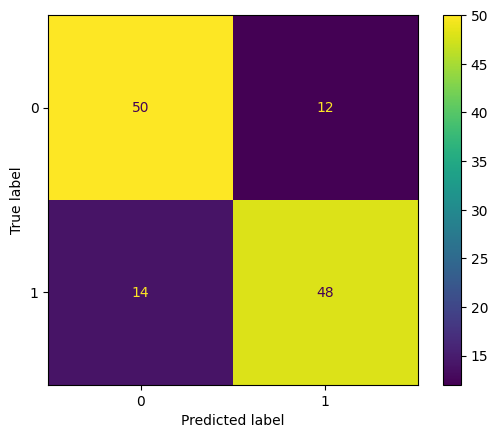

In [7]:
predictions = knn.predict(x_monk1_tr)

cm = confusion_matrix(y_monk1_tr, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Model selection
We choose the model that returns the best accuracy on the validation set.

In [8]:
joblib.dump(knn, './results/monk1/KNN/knn.z')

['./results/monk1/KNN/knn.z']

### Model assessment
After the selection phase we assess the generalization capabilities of the final model.

In [9]:
score1 = knn.score(x_monk1_ts, y_monk1_ts)

In [10]:
print("Final accuracy on the test set: " + str(score1))

Final accuracy on the test set: 0.6666666666666666


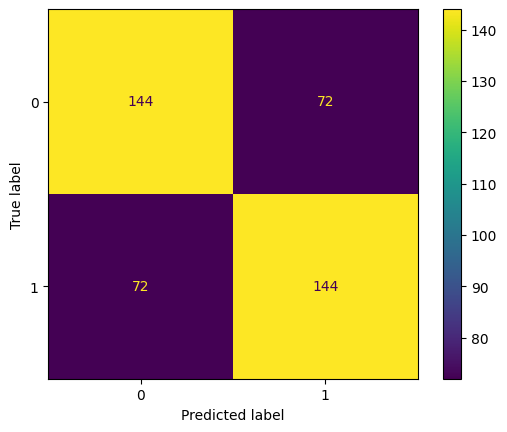

In [11]:
predictions = knn.predict(x_monk1_ts)

cm = confusion_matrix(y_monk1_ts, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Monk 2

### Importing datasets

In [12]:
colnames = ['class', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'id']
monk2_tr = pd.read_csv("./dataset/monk2/monks-2.train", sep = " ", skipinitialspace=True, names = colnames)
monk2_tr = monk2_tr.drop('id', axis = 1)

monk2_ts = pd.read_csv("./dataset/monk2/monks-2.test", sep = " ", skipinitialspace=True, names = colnames)
monk2_ts = monk2_ts.drop('id', axis = 1)

In [13]:
x_monk2_tr = monk2_tr.iloc[:, 1:7].values
y_monk2_tr = monk2_tr.iloc[:, 0].values

x_monk2_ts = monk2_ts.iloc[:, 1:7].values
y_monk2_ts = monk2_ts.iloc[:, 0].values

### Data normalization

In [14]:
scaler = StandardScaler()
scaler.fit(x_monk2_tr)
x_monk2_tr = scaler.transform(x_monk2_tr)
x_monk2_ts = scaler.transform(x_monk2_ts)

### Grid search
We are going to tune the hyperparameters on _n\_neighbors_ and _algorithm_.

In [15]:
n_neighbors = np.arange(1, 50)
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

param_grid = dict(
    n_neighbors = n_neighbors,
    algorithm = algorithm
)

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid = param_grid,
    cv = 5,
    scoring = 'accuracy',
    verbose = 4,
    n_jobs = -1
)

grid.fit(x_monk2_tr, y_monk2_tr)

print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)

Fitting 5 folds for each of 196 candidates, totalling 980 fits
The best parameters are {'algorithm': 'auto', 'n_neighbors': 1} with a score of 0.68111


In [16]:
knn = grid.best_estimator_

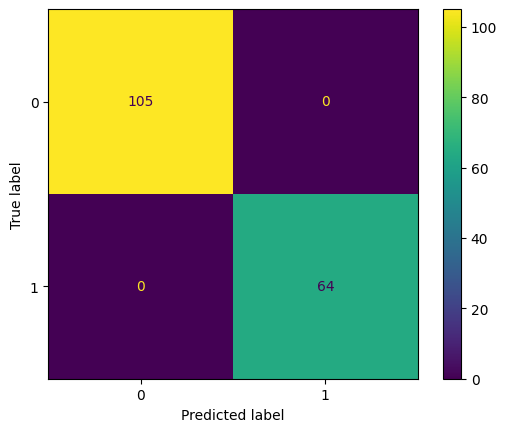

In [17]:
predictions = knn.predict(x_monk2_tr)

cm = confusion_matrix(y_monk2_tr, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Model selection
We choose the model that returns the best accuracy on the validation set.

In [18]:
joblib.dump(knn, './results/monk2/KNN/knn.z')

['./results/monk2/KNN/knn.z']

### Model assessment
After the selection phase we assess the generalization capabilities of the final model.

In [19]:
score2 = knn.score(x_monk2_ts, y_monk2_ts)

In [20]:
print("Final accuracy on the test set: " + str(score2))

Final accuracy on the test set: 0.8171296296296297


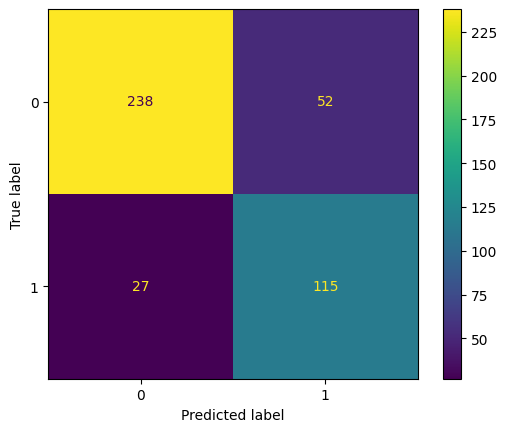

In [21]:
predictions = knn.predict(x_monk2_ts)

cm = confusion_matrix(y_monk2_ts, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Monk 3

### Importing datasets

In [22]:
colnames = ['class', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'id']
monk3_tr = pd.read_csv("./dataset/monk3/monks-3.train", sep = " ", skipinitialspace=True, names = colnames)
monk3_tr = monk3_tr.drop('id', axis = 1)

monk3_ts = pd.read_csv("./dataset/monk3/monks-3.test", sep = " ", skipinitialspace=True, names = colnames)
monk3_ts = monk3_ts.drop('id', axis = 1)

In [23]:
x_monk3_tr = monk3_tr.iloc[:, 1:7].values
y_monk3_tr = monk3_tr.iloc[:, 0].values

x_monk3_ts = monk3_ts.iloc[:, 1:7].values
y_monk3_ts = monk3_ts.iloc[:, 0].values

### Data normalization

In [24]:
scaler = StandardScaler()
scaler.fit(x_monk3_tr)
x_monk3_tr = scaler.transform(x_monk3_tr)
x_monk3_ts = scaler.transform(x_monk3_ts)

### Grid search
We are going to tune the hyperparameters on _n\_neighbors_ and _algorithm_.

In [25]:
n_neighbors = np.arange(1, 50)
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

param_grid = dict(
    n_neighbors = n_neighbors,
    algorithm = algorithm
)

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid = param_grid,
    cv = 5,
    scoring = 'accuracy',
    verbose = 4,
    n_jobs = -1
)

grid.fit(x_monk3_tr, y_monk3_tr)

print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)

Fitting 5 folds for each of 196 candidates, totalling 980 fits
The best parameters are {'algorithm': 'auto', 'n_neighbors': 22} with a score of 0.84500


In [26]:
knn = grid.best_estimator_

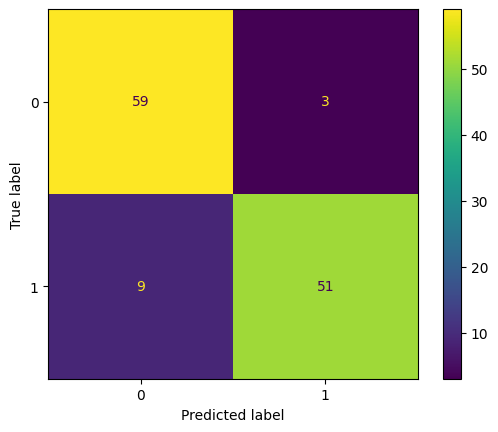

In [27]:
predictions = knn.predict(x_monk3_tr)

cm = confusion_matrix(y_monk3_tr, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Model selection
We choose the model that returns the best accuracy on the validation set.

In [28]:
joblib.dump(knn, './results/monk3/KNN/knn.z')

['./results/monk3/KNN/knn.z']

### Model assessment
After the selection phase we assess the generalization capabilities of the final model.

In [29]:
score3 = knn.score(x_monk3_ts, y_monk3_ts)

In [30]:
print("Final accuracy on the test set: " + str(score3))

Final accuracy on the test set: 0.8773148148148148


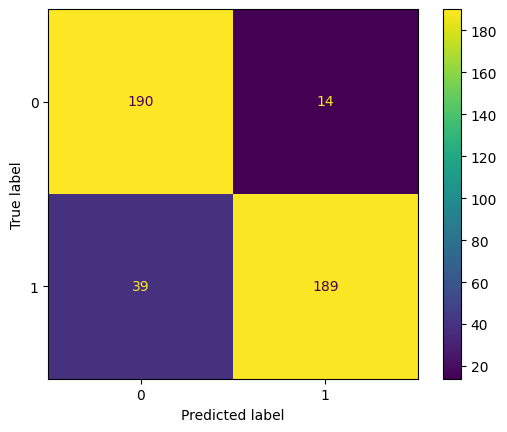

In [31]:
predictions = knn.predict(x_monk3_ts)

cm = confusion_matrix(y_monk3_ts, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()